In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv('./Datasets/balance-scale.data')
data.rename(columns={'1': 'LW', '1.1': 'LD', '1.2': 'RW', '1.3': 'RD'}, inplace=True)
print(data)
data.info()

     B  LW  LD  RW  RD
0    R   1   1   1   2
1    R   1   1   1   3
2    R   1   1   1   4
3    R   1   1   1   5
4    R   1   1   2   1
..  ..  ..  ..  ..  ..
619  L   5   5   5   1
620  L   5   5   5   2
621  L   5   5   5   3
622  L   5   5   5   4
623  B   5   5   5   5

[624 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B       624 non-null    object
 1   LW      624 non-null    int64 
 2   LD      624 non-null    int64 
 3   RW      624 non-null    int64 
 4   RD      624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [3]:
le = LabelEncoder()
labels=data[['LW', 'LD', 'RW', 'RD']]
data['Ble'] = le.fit_transform(data['B'])
outcome = data['Ble']
trainx, testx, trainy, testy = train_test_split(labels, outcome, test_size=0.25, random_state=29538)

In [4]:
model = GaussianNB()
model.fit(trainx, trainy)
preds = model.predict(testx)
proba = model.predict_proba(testx)

[[ 0  3  2]
 [ 0 76  2]
 [ 0  0 73]]


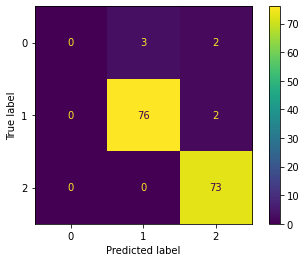

(156, 4)

In [5]:
cm = confusion_matrix(testy, preds)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.show()
testx.shape

In [6]:
acc = accuracy_score(testy,preds)
rec = recall_score(testy, preds , average='micro')
pre = precision_score(testy, preds, average='micro')
f1 = f1_score(testy, preds, average='micro')
mcc = matthews_corrcoef(testy, preds)
print(f"{acc=},{rec=}, {pre=}, {f1=}, {mcc=}")

acc=0.9551282051282052,rec=0.9551282051282052, pre=0.9551282051282052, f1=0.9551282051282052, mcc=0.9149290563751271


AUC's:
balanced vs rest:  0.7774834437086093
left vs rest:  0.9975345167652859
right vs rest:  0.9986796501072784


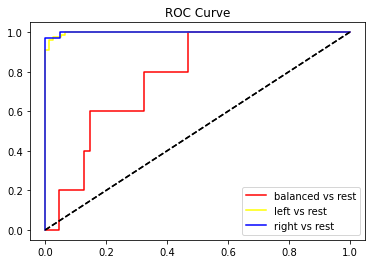

In [7]:
fpr={}
tpr={}
thresh={}
auc={}

def get_auc(fprs, tprs):
    fpr = fprs[::-1]
    tpr = tprs[::-1]
    x1,y1 = fpr[0], tpr[0]
    auc=0.0
    diffs = [fpr[i] - fpr[i-1] for i in range(1, len(fpr))]
    for x,y in zip(diffs, tpr[1:]):
        auc+=(x*y1)
        auc+=(x*(y-y1)/2)
        y1=y
    return auc
        
        
nclass = 3
for i in range(nclass):
    fpr[i], tpr[i], thresh[i] = roc_curve(testy, proba[:,i], pos_label=i)
    auc[i] = get_auc(fpr[i], tpr[i])

    
print("AUC's:")
print("balanced vs rest: ", -auc[0])
print("left vs rest: ", -auc[1])
print("right vs rest: ", -auc[2])



plt.plot(fpr[0], tpr[0], linestyle='-', color='red', label='balanced vs rest')
plt.plot(fpr[1], tpr[1], linestyle='-', color='yellow', label='left vs rest')
plt.plot(fpr[2], tpr[2], linestyle='-', color='blue', label='right vs rest')
plt.plot([[0, 0], [1, 1]], linestyle='--', color="black")
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()